In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dl-kaggle-dataset/cleaned_train_x.csv
/kaggle/input/dl-kaggle-dataset/cleaned_val_x.csv
/kaggle/input/dl-kaggle-dataset/Train.py
/kaggle/input/dl-kaggle-dataset/cleaned_test_x.csv
/kaggle/input/dl-kaggle-dataset/train_y.csv
/kaggle/input/dl-kaggle-dataset/train_x.csv
/kaggle/input/dl-kaggle-dataset/test_x.csv
/kaggle/input/dl-kaggle-dataset/glove.840B.300d.txt
/kaggle/input/dl-kaggle-dataset/DataPreprocessing.py
/kaggle/input/dl-kaggle-dataset/val_x.csv
/kaggle/input/dl-kaggle-dataset/val_y.csv
/kaggle/input/dl-kaggle-dataset/rnn_baseline.py
/kaggle/input/dl-kaggle-dataset/cleanwords.txt
/kaggle/input/dl-kaggle-dataset/DataLoader.py


In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
import matplotlib_venn as venn

In [3]:
train_y = pd.read_csv(os.path.join(dirname, 'train_y.csv'))
val_y = pd.read_csv(os.path.join(dirname, 'val_y.csv'))

In [4]:
print("Check for missing values in labels")
null_check_train = train_y.isnull().sum()
print(null_check_train)
null_check_val = val_y.isnull().sum()
print(null_check_val)

Check for missing values in labels
male                  0
female                0
LGBTQ                 0
christian             0
muslim                0
other_religions       0
black                 0
white                 0
identity_any          0
severe_toxicity       0
obscene               0
threat                0
insult                0
identity_attack       0
sexual_explicit       0
y                     0
from_source_domain    0
dtype: int64
male                  0
female                0
LGBTQ                 0
christian             0
muslim                0
other_religions       0
black                 0
white                 0
identity_any          0
severe_toxicity       0
obscene               0
threat                0
insult                0
identity_attack       0
sexual_explicit       0
y                     0
from_source_domain    0
dtype: int64


In [6]:
train_y.columns
classes = ['male', 'female', 'LGBTQ', 'christian', 'muslim', 'other_religions', 'black', 'white']

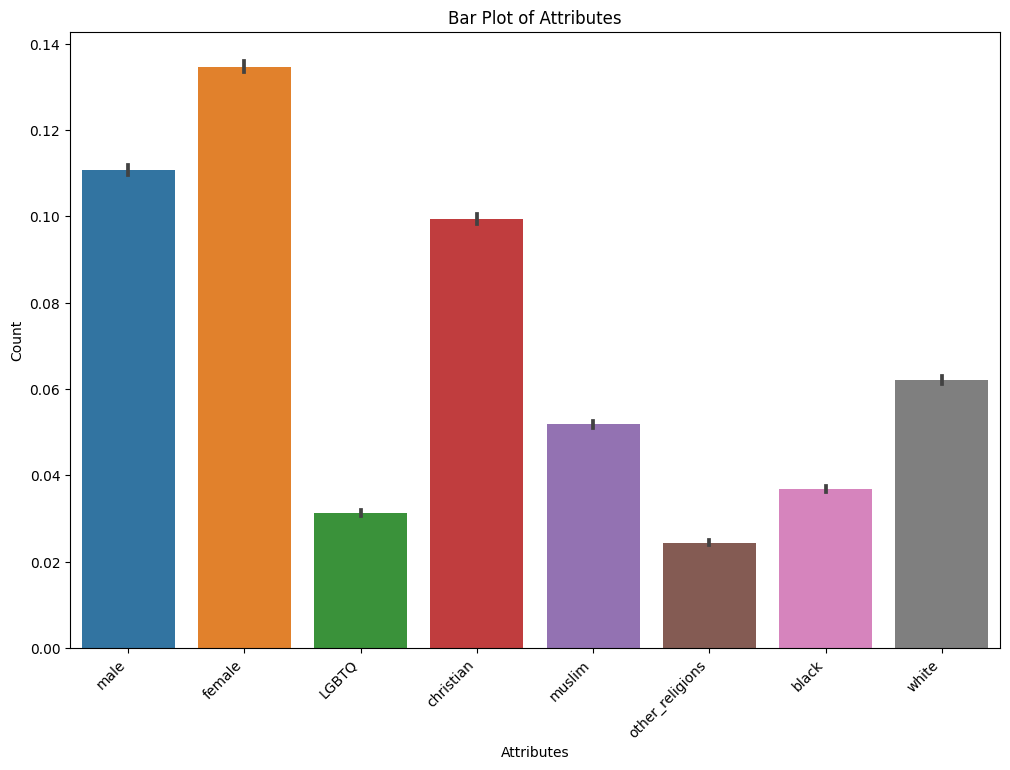

In [7]:
plt.figure(figsize=(12, 8))

sns.barplot(data=train_y[classes])
plt.xticks(rotation=45, ha="right")
plt.xlabel('Attributes')
plt.ylabel('Count')
plt.title('Bar Plot of Attributes')
plt.show()

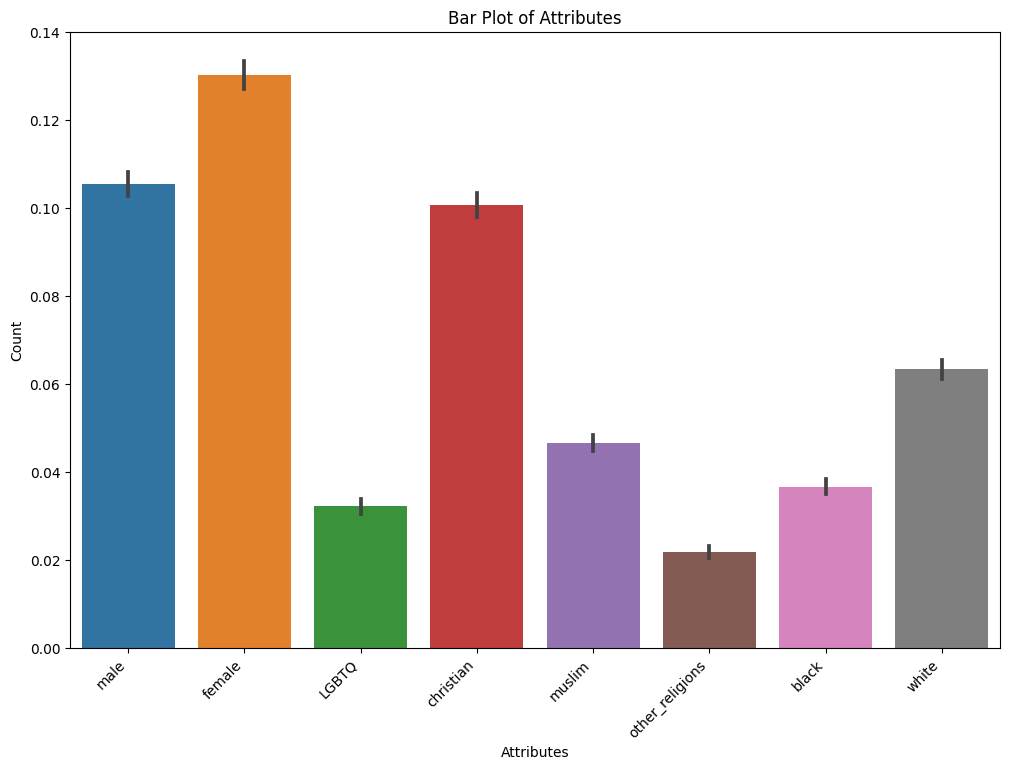

In [8]:
plt.figure(figsize=(12, 8))

sns.barplot(data=val_y[classes])
plt.xticks(rotation=45, ha="right")
plt.xlabel('Attributes')
plt.ylabel('Count')
plt.title('Bar Plot of Attributes')
plt.show()

In [13]:
train_y

,male,female,LGBTQ,christian,muslim,other_religions,black,white,identity_any,severe_toxicity,obscene,threat,insult,identity_attack,sexual_explicit,y,from_source_domain
0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1
1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269033,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
269034,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
269035,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
269036,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
